# Data Parsing
This notebook is intended for parsing csv data to json data. This will increase to loading speed for initializing the frontend web.

In [1]:
import pandas as pd
import json
import missingno as msno

In [2]:
# manually specify the data type of specific columns cid_cases
dtype_for_health_quality = {
    'Year': "Int64",
    'Data_Value_Footnote_Symbol': str,
    'Data_Value_Footnote': str,
    'Data_Value_Std_Err': str,
    'Data_Value_Unit': str,
    'Sample_Size': "Int64"
}

df_health_quality = pd.read_csv(
    '../health-related-quality-of-life/rows.csv', 
    dtype=dtype_for_health_quality
)

df_infectious_disease = pd.read_csv(
    '../infectious-disease-2001-2014/rows.csv'
)

## Simple EDA

In [3]:
df_infectious_disease.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable
0,Amebiasis,California,2001,Total,571,34514777,1.654,1.521,1.796,
1,Amebiasis,California,2001,Female,176,17340743,1.015,0.871,1.176,
2,Amebiasis,California,2001,Male,365,17174034,2.125,1.913,2.355,
3,Amebiasis,California,2002,Total,442,34940334,1.265,1.150,1.389,
4,Amebiasis,California,2002,Female,145,17555714,0.826,0.697,0.972,


In [4]:
df_infectious_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141777 entries, 0 to 141776
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Disease     141777 non-null  object 
 1   County      141777 non-null  object 
 2   Year        141777 non-null  int64  
 3   Sex         141777 non-null  object 
 4   Count       141777 non-null  int64  
 5   Population  141777 non-null  int64  
 6   Rate        141777 non-null  float64
 7   CI.lower    141777 non-null  float64
 8   CI.upper    141777 non-null  float64
 9   Unstable    141777 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 10.8+ MB


In [5]:
df_health_quality.head()

,Year,LocationAbbr,LocationDesc,Category,Topic,Question,DataSource,Data_Value_Unit,Data_Value_Type,Data_Value,...,Sample_Size,Break_Out,Break_Out_Category,GeoLocation,CategoryId,TopicId,QuestionId,LocationId,BreakOutId,BreakOutCategoryid
0,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,0.9,...,202,18-24 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age1,GPAGE
1,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,2.0,...,597,25-34 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age2,GPAGE
2,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,2.3,...,892,35-44 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age3,GPAGE
3,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,4.2,...,1352,45-54 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age4,GPAGE
4,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,4.0,...,1621,55-64 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age5,GPAGE


In [6]:
df_health_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126464 entries, 0 to 126463
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        119808 non-null  Int64  
 1   LocationAbbr                126464 non-null  object 
 2   LocationDesc                126464 non-null  object 
 3   Category                    126464 non-null  object 
 4   Topic                       126464 non-null  object 
 5   Question                    126464 non-null  object 
 6   DataSource                  126464 non-null  object 
 7   Data_Value_Unit             63232 non-null   object 
 8   Data_Value_Type             126464 non-null  object 
 9   Data_Value                  110389 non-null  float64
 10  Data_Value_Footnote_Symbol  3936 non-null    object 
 11  Data_Value_Footnote         16075 non-null   object 
 12  Data_Value_Std_Err          0 non-null       object 
 13  Low_Confidence

## Missing value

<AxesSubplot:>

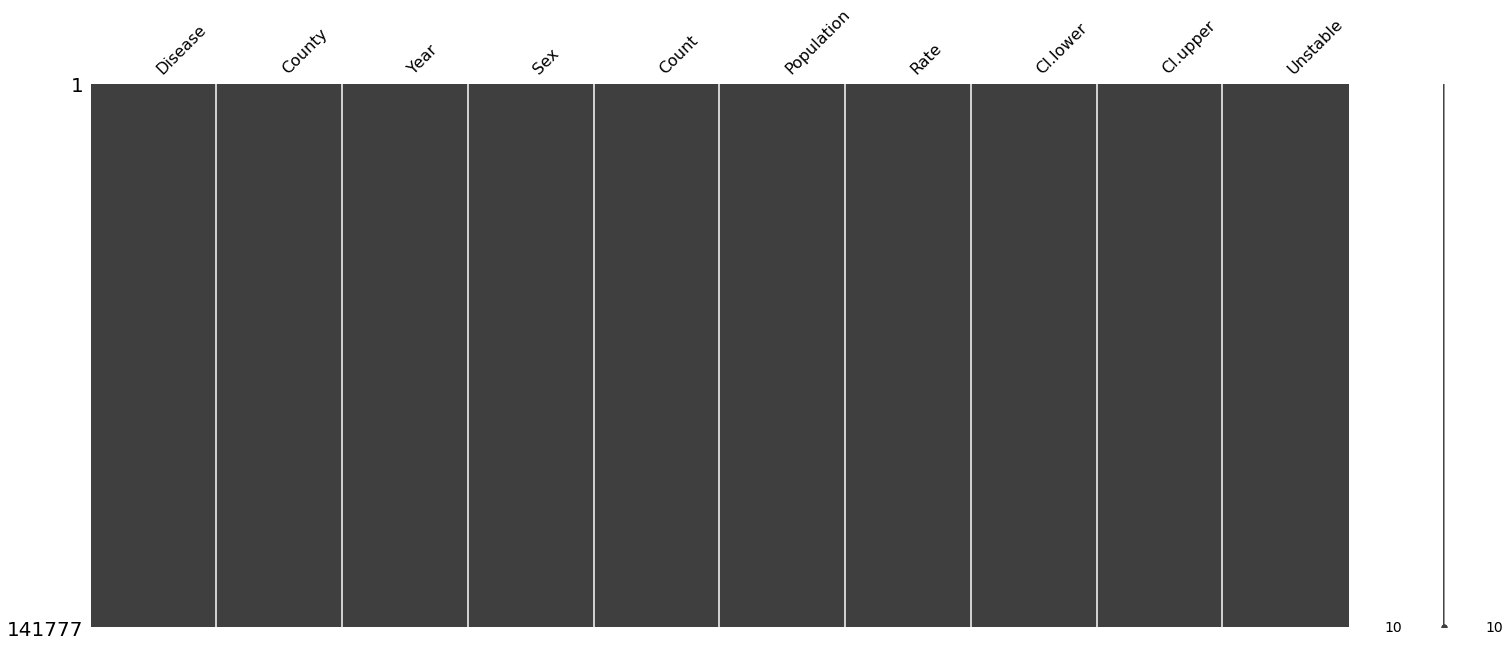

In [8]:
msno.matrix(df_infectious_disease)

In [17]:
df_infectious_disease[df_infectious_disease.isna().any(axis=1)]

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable


<AxesSubplot:>

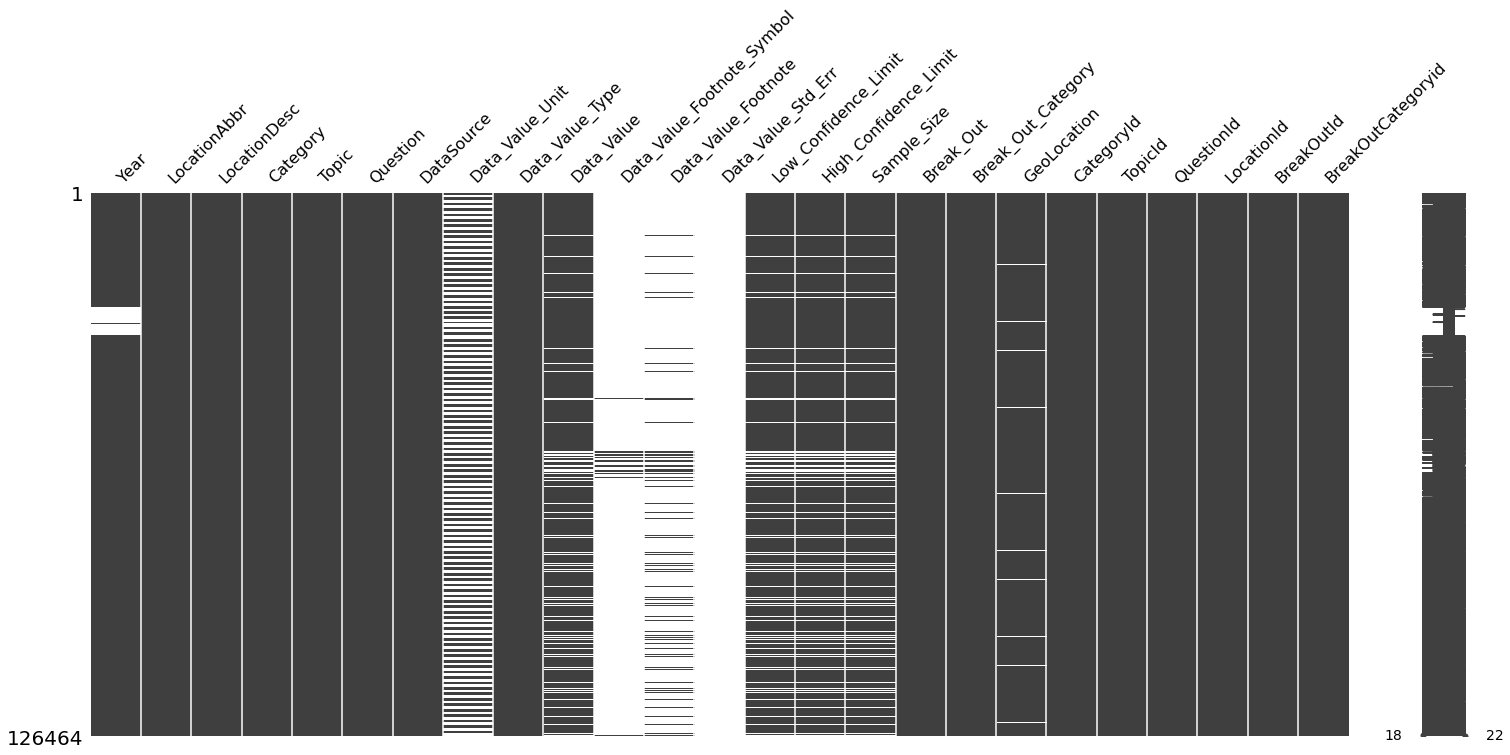

In [7]:
msno.matrix(df_health_quality)

## Missing value cleaning strategy

### Infectious Disease 
- got no missing value

### Quality of Life

##### Columns to drop

Drop missing value column

- `Data_Value_Footnote_Symbol`
- `Data_Value_footnote`
- `Data_Value_Std_Err`

Drop not in used column

- `DataSource`, `CategoryId`, `TopicId`, `QuestionId`, `LocationId`, `BreakOutId`, `BreakOutCategoryid`

Other than that, `Data_Value_Unit` will be dropped too because it's the same as `Data_Value_Type`

##### Row to drop
- The row with missing value in column `Year`

In [30]:
# print(df_health_quality.columns.tolist())
# print(len(df_health_quality.columns.tolist()))

In [28]:
# Double check that all year counts are the same. No missing year.
# df_health_quality.Year.value_counts(sort=True)

In [29]:
# check any row with null value for column 0-5
# df_health_quality[df_health_quality.iloc[:,[18]].isna().any(axis=1)]

In [3]:
# columns to drop
df_health_quality.drop(
    columns=["DataSource",
             "Data_Value_Footnote_Symbol",
             "Data_Value_Footnote",
             "Data_Value_Std_Err",
             "Category",
             "CategoryId",
             "TopicId",
             "QuestionId",
             "LocationId",
             "BreakOutId",
             "BreakOutCategoryid",
             "Data_Value_Unit",
             "GeoLocation"], 
    inplace=True)

# rows to drop
df_health_quality = df_health_quality[df_health_quality['Year'].notna()]

# columns reorder
df_health_quality = df_health_quality[
    ["Year", 
     "LocationAbbr", "LocationDesc",
     'Topic', 'Question',
     'Break_Out_Category', 'Break_Out',
     'Data_Value_Type', 'Data_Value',
     'Low_Confidence_Limit', 'High_Confidence_Limit',
     'Sample_Size',
    ]
]

<AxesSubplot:>

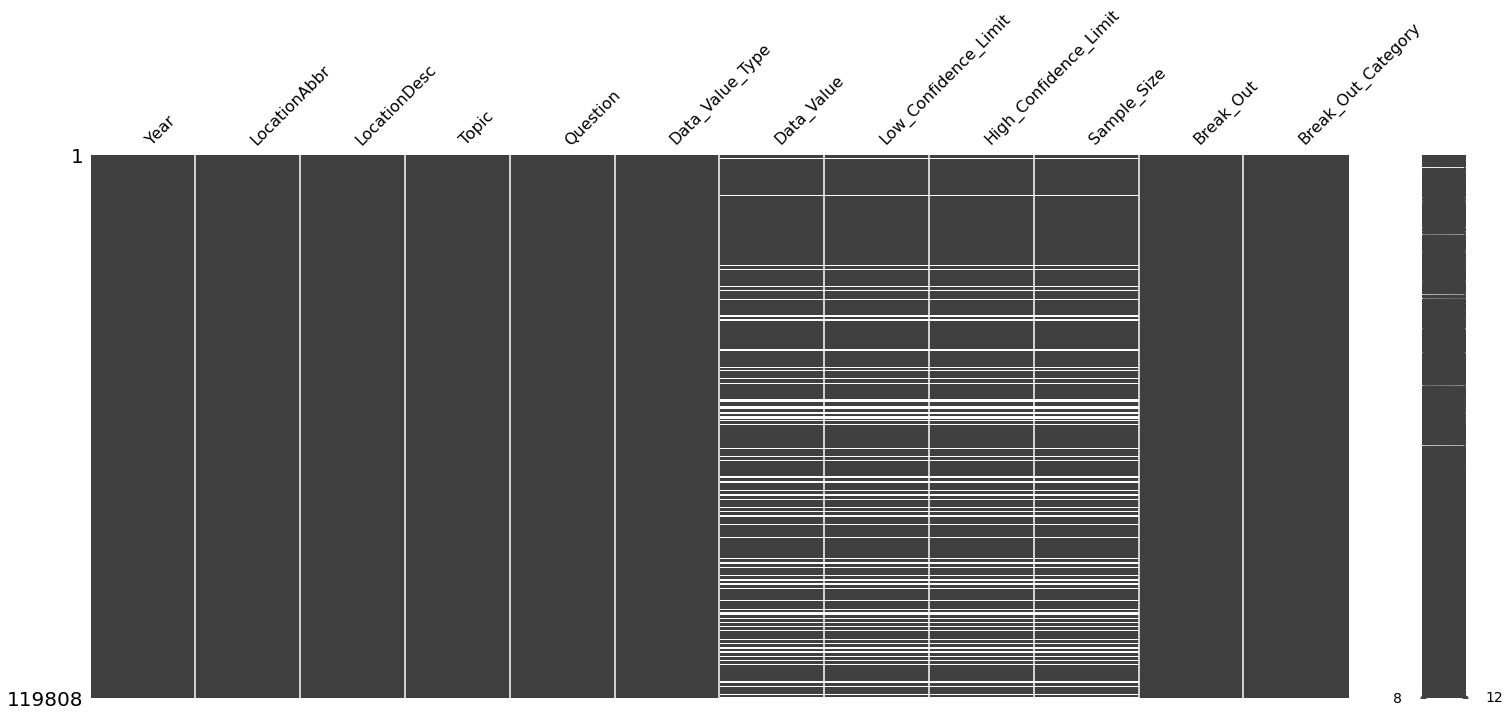

In [4]:
msno.matrix(df_health_quality)

### EDA for Sort By

In [19]:
# df_health_quality_groupby_Break_Out = df_health_quality.groupby(by=['Break_Out'], dropna=False).sum()
# df_health_quality_groupby_Break_Out

In [9]:
# sort by

df_infectious_disease_by_year = df_infectious_disease.sort_values(by=['Year', 'County', 'Disease', 'Sex'])
df_infectious_disease_by_year = df_infectious_disease_by_year[
    ["Year", 
     "County", 
     "Disease",
     'Sex', 
     'Population',
     'Count',
     'Rate',
     'CI.lower',
     'CI.upper',
     'Unstable'
    ]
]
df_infectious_disease_by_year

,Year,County,Disease,Sex,Population,Count,Rate,CI.lower,CI.upper,Unstable
43,2001,Alameda,Amebiasis,Female,746829,7,0.937,0.377,1.931,*
44,2001,Alameda,Amebiasis,Male,719209,9,1.251,0.572,2.375,*
42,2001,Alameda,Amebiasis,Total,1466038,16,1.091,0.624,1.772,*
2521,2001,Alameda,Anaplasmosis and Ehrlichiosis,Female,746829,0,0.000,0.000,0.494,-
2522,2001,Alameda,Anaplasmosis and Ehrlichiosis,Male,719209,0,0.000,0.000,0.513,-
...,...,...,...,...,...,...,...,...,...,...
139312,2014,Yuba,Vibrio Infection (non-Cholera),Male,36922,0,0.000,0.000,9.991,-
139310,2014,Yuba,Vibrio Infection (non-Cholera),Total,73425,0,0.000,0.000,5.024,-
141775,2014,Yuba,Yersiniosis,Female,36503,0,0.000,0.000,10.105,-
141776,2014,Yuba,Yersiniosis,Male,36922,0,0.000,0.000,9.991,-


### Data Needed
Second round filter to select data that will be used.

Quality of life (1)
- Year
- Question
- LocationDesc
- Data_Value
- Break_Out (tooltip pie chart)
- Break_Out_Data_Value (tooltip pie chart) 
 
Quality of life (2)
- Year
- Question
- Break_Out
- Data_Value
- Low CL
- High CL
- Sample Size

Infectious Disease
- Year
- Disease
- County
- Sex
- Rate
- Count

## Parse Dataframe To Json

In [21]:
# dataset for testing purpose only
# if use full dataset the test, the whole client will crash

# test_health_quality = df_health_quality.iloc[:1000,:]
# test_health_quality

# test_infectious_disease = df_infectious_disease.iloc[:1000,:]
# test_infectious_disease

In [22]:
# parse df to json

def parse_df_to_json_records(data):
    json_data = data.to_json(orient="records")
    return json.loads(json_data)

# unflatten original dict

def unflatten_dict_health_quality(data):
    
    dict_data = {}

    for d in data:
        dict_data[str(d['Year'])] = {}
        
    for d in data:
        dict_data[str(d['Year'])][d['LocationDesc']] = {}
    
    for d in data:
        dict_data[str(d['Year'])][d['LocationDesc']][d['Question']] = {}
    
    for d in data:
        dict_data[str(d['Year'])][d['LocationDesc']][d['Question']][d['Break_Out']] = {
            'Data_Value': d['Data_Value'],
            'Low_Confidence_Limit': d['Low_Confidence_Limit'],
            'High_Confidence_Limit': d['High_Confidence_Limit'],
            'Sample_Size': d['Sample_Size']
        }

    # print(json.dumps(dict_data, indent=2))
    return dict_data

def unflatten_dict_health_quality_2(data):
    
    dict_data = {}

    for d in data:
        dict_data[str(d['Year'])] = {}
    
    for d in data:
        dict_data[str(d['Year'])][d['Question']] = {}
    
    for d in data:
        dict_data[str(d['Year'])][d['Question']][d['Break_Out']] = {
            'Data_Value': d['Data_Value'],
            'Low_Confidence_Limit': d['Low_Confidence_Limit'],
            'High_Confidence_Limit': d['High_Confidence_Limit'],
            'Sample_Size': d['Sample_Size']
        }

    # print(json.dumps(dict_data, indent=2))
    return dict_data

def unflatten_dict_cid_cases_1(data):
    
    dict_data = {}

    for d in data:
        dict_data[d['Disease']] = {}
        
    for d in data:
        dict_data[d['Disease']][d['County']] = {}
    
    for d in data:
        dict_data[d['Disease']][d['County']][str(d['Year'])] = {}
    
    for d in data:
        dict_data[d['Disease']][d['County']][str(d['Year'])][d['Sex']] = {
            'Count': d['Count'],
            'Population': d['Population'],
            'Rate': d['Rate'],
            'CI.lower': d['CI.lower'],
            'CI.upper': d['CI.upper'],
            'Unstable': d['Unstable']
        }

    # print(json.dumps(dict_data, indent=2))
    return dict_data

In [23]:
# quality of life 

# parsed_health_quality = parse_df_to_json_records(df_health_quality)
# dict_health_quality = unflatten_dict_health_quality(parsed_health_quality)

In [24]:
# infectious disease

parsed_infectious_disease = parse_df_to_json_records(df_infectious_disease)
dict_infectious_disease = unflatten_dict_cid_cases_1(parsed_infectious_disease)

## Store data in file .json

In [26]:
# store all the dict locally

def write_dict_to_file_QualityOfLife():
    with open("quality_of_life.json", "w") as write_file:
        json.dump(dict_health_quality, write_file, indent=2)
        
def write_dict_to_file_InfectiousDisease():
    with open("infectious_disease.json", "w") as write_file:
        json.dump(dict_infectious_disease, write_file, indent=2)

write_dict_to_file_InfectiousDisease()

In [27]:
# store all the dict to react-app

def write_dict_to_react_app():
    with open("../../react-app/src/data/quality_of_life.json", "w") as write_file:
        json.dump(dict_health_quality, write_file, indent=2)
        
def write_dict_to_react_app_InfectiousDisease():
    with open("../../react-app/src/data/infectious_disease.json", "w") as write_file:
        json.dump(dict_infectious_disease, write_file, indent=2)
        
write_dict_to_react_app_InfectiousDisease()